In [1]:

from pkg_resources import resource_filename

import os
import numpy as np
import pandas as pd
import datetime

from digicampipe.instrument import geometry
from digicampipe.io.event_stream import event_stream, add_slow_data


from cts_core.camera import Camera
from ctapipe.visualization import CameraDisplay

import matplotlib.pyplot as plt


import astropy.units as u

In [2]:
digicam_config_file = resource_filename('digicampipe','tests/resources/camera_config.cfg')
digicam = Camera(_config_file=digicam_config_file)
geom = geometry.generate_geometry_from_camera(camera=digicam)
geom.pix_area = np.ones(geom.n_pixels)*482.05

In [11]:
files = ['/net/cs2/data/raw/2022/11/14/SST1M2/SST1M2_20221114_0025.fits.fz']
#files = ['/net/cs1/data/raw/2022/11/14/SST1M1/SST1M1_20221114_0021.fits.fz']

In [4]:
data_stream = event_stream(filelist   = files,
                           max_events = 500,
                           disable_bar = True
                           )

In [5]:
baslines_mean = np.array([ [] for pix in geom.pix_id ]).T
baslines_std  = np.array([ [] for pix in geom.pix_id ]).T

for event in data_stream:
    r0data = event.r0.tel[event.r0.tels_with_data[0]]
    
    if r0data._camera_event_type.value==8:  ## filter monitoring trigger
        baslines_mean = np.append(baslines_mean, [r0data.adc_samples.mean(axis=1)], axis=0)
        baslines_std  = np.append(baslines_std , [r0data.adc_samples.std(axis=1)],  axis=0)

/home/zrdz/anaconda3/envs/digicampipe/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: generator 'event_stream' raised StopIteration
  after removing the cwd from sys.path.


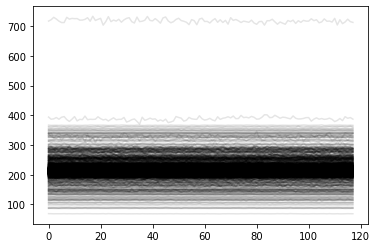

In [6]:
p=plt.plot(baslines_mean,alpha=.1,color='black')

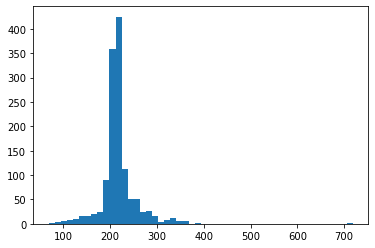

In [7]:
n,b,p = plt.hist(baslines_mean.mean(axis=0),50)

Text(0.5, 1.0, 'mean baselines')

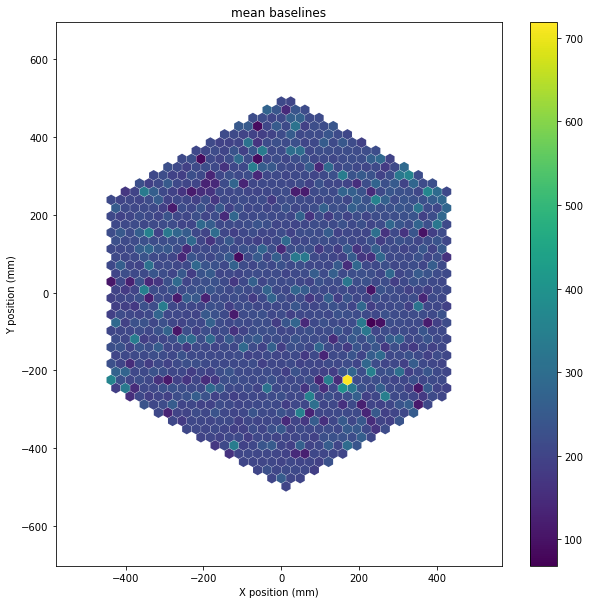

In [8]:
f,ax = plt.subplots(figsize=(10,10))
disp = CameraDisplay(geom,ax=ax)
disp.add_colorbar(ax=ax)
disp.image = baslines_mean.mean(axis=0)
ax.set_title("mean baselines")

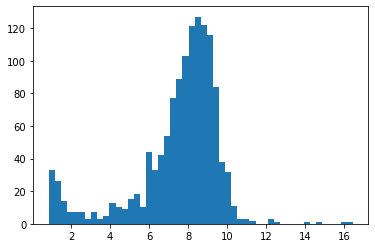

In [9]:
n,b,p = plt.hist(baslines_std.mean(axis=0),50)

Text(0.5, 1.0, 'baselines st.d.')

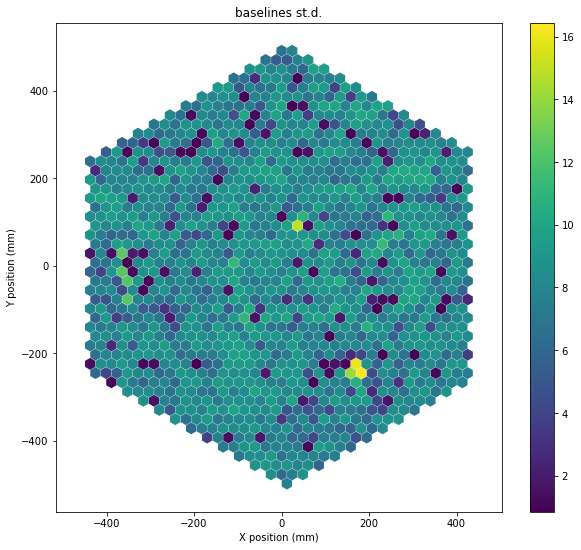

In [10]:
f,ax = plt.subplots(figsize=(10,9))
disp = CameraDisplay(geom,ax=ax)
disp.add_colorbar(ax=ax)
disp.image = baslines_std.mean(axis=0)
ax.set_title("baselines st.d.")